In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

from skimage.morphology import watershed
from skimage.feature import peak_local_max

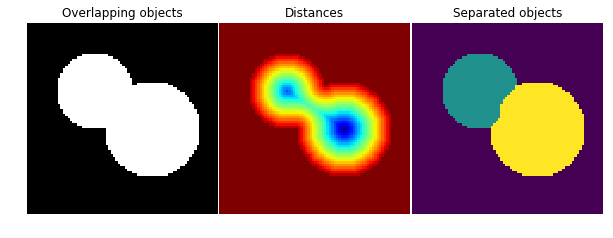

In [3]:
# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndimage.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndimage.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.7))
ax0, ax1, ax2 = axes

ax0.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax0.set_title('Overlapping objects')
ax1.imshow(-distance, cmap=plt.cm.jet, interpolation='nearest')
ax1.set_title('Distances')
#ax2.imshow(labels, cmap=plt.cm.spectral, interpolation='nearest')
ax2.imshow(labels, interpolation='nearest')
ax2.set_title('Separated objects')

for ax in axes:
    ax.axis('off')

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0,
                    right=1)
plt.show()

In [5]:
print(distance)
print(local_maxi)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [6]:
# Data Abstraction [this is code-specific]
src = '/mnt/WS_PN107151/dsideriu/Research/Monte_Carlo/my_FEASST/Ar-CO2_slit_pore/Full_Run_SKX'
MC_output = 'colMat'

with open(src+'/'+MC_output,mode='r') as f:
    text_in = f.readlines()

    
for (lineID,line) in enumerate(text_in):
    if (line.split()[1] == 'lnz'):
        lnZ = float(line.split()[2])
    elif (line.split()[1] == 'beta'):
        beta = float(line.split()[2])
        T = 1./beta
    #print(line.strip('\n'))
    elif (line.split()[1] == 'macrostate(nmol)'): #macrostate data is after this
        macro_data = text_in[(lineID+1):]

N = np.array( [ int(x.split()[0]) for x in macro_data ] )
lnPi = np.array( [ float(x.split()[1]) for x in macro_data ] )
#energy = np.array( [ float(x.split()[2]) for x in macro_data ] )
#energy = np.array( [ float(x.split()[9])/float(x.split()[8]) for x in macro_data ] )
#energy2 = np.array( [ float(x.split()[10])/float(x.split()[8]) for x in macro_data ] )

In [9]:
from scipy.signal import argrelextrema

In [12]:
# Argrelextrema

print(argrelextrema( lnPi, np.greater ))
print(argrelextrema( lnPi, np.less ))

(array([209]),)
(array([], dtype=int64),)


In [25]:
# Watershed (?)

max_logical = peak_local_max(lnPi)
print(max_logical[0][0], lnPi[max_logical[0][0]])

min_logical = peak_local_max(-lnPi)
print(min_logical)

209 -2.7843288380165196
[]
